In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from tqdm import tqdm

# import torch
# import torch.nn as nn
# import torch.optim as optim

import seaborn as sns
sns.set(font_scale=2)

In [2]:
path = "../data/rf_data/"
packet = 5
subflow = 5
features = 11
X_train_path = path+"packet_"+str(packet)+"/n_"+str(subflow)+"/X_train_n_"+str(subflow)+".npy"
y_train_path = path+"packet_"+str(packet)+"/n_"+str(subflow)+"/y_train_n_"+str(subflow)+".npy"

X_test_path = path+"packet_"+str(packet)+"/n_"+str(subflow)+"/X_test_n_"+str(subflow)+".npy"
y_test_path = path+"packet_"+str(packet)+"/n_"+str(subflow)+"/y_test_n_"+str(subflow)+".npy"

save_path = "./artifacts/"
model_save_path = save_path+"models/model_k_"+str(packet)+"_n_"+str(subflow)+"_f_"+str(features*subflow)+".pth"
scaler_save_path = save_path+"scalers/scaler_k_"+str(packet)+"_n_"+str(subflow)+"_f_"+str(features*subflow)+".pkl"

In [3]:
# This data is not normalized
X_train = np.load(X_train_path, allow_pickle=True)
y_train = np.load(y_train_path, allow_pickle=True)

X_test = np.load(X_test_path, allow_pickle=True)
y_test = np.load(y_test_path, allow_pickle=True)

In [4]:
np.unique(y_train, return_counts=True)

(array(['attack', 'benign'], dtype='<U6'), array([ 1985, 23925]))

## IF

In [5]:
clf = IsolationForest(random_state=1000, contamination=0.06).fit(X_train)

In [6]:
predictions = clf.predict(X_test)

In [7]:
predictions

array([-1, -1, -1, ..., -1,  1,  1])

In [8]:
y_test

array(['attack', 'attack', 'attack', ..., 'benign', 'benign', 'benign'],
      dtype='<U6')

In [9]:
converted_preds = np.where(predictions==-1,"attack","benign")

In [10]:
converted_preds

array(['attack', 'attack', 'attack', ..., 'attack', 'benign', 'benign'],
      dtype='<U6')

Accuracy =  0.8866
Precision =  0.5527
Recall =  0.5455
F1 =  0.5486


<AxesSubplot:>

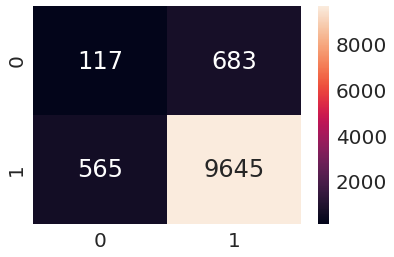

In [11]:
#Print overall accuracy
print("Accuracy = ", round(metrics.accuracy_score(y_test, converted_preds), 4))
print("Precision = ", round(metrics.precision_score(y_test, converted_preds, average='macro'),4))
print("Recall = ", round(metrics.recall_score(y_test, converted_preds, average='macro'),4))
print("F1 = ", round(metrics.f1_score(y_test, converted_preds, average='macro'), 4))
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, converted_preds) # tn, fp, fn, tp
sns.heatmap(cm, annot=True, fmt='.10g')